<h1><b>Задача 1 - Machine Learning FMI 2017/2018</b></h1>

Изберете си dataset и му направете "Exploratory data analysis". Изберете си колона и натренирайте Линейна или Логистична регресия. Оценете модела срещу тренировъчното и тестово множество.

In [1]:
import sys

import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<h2>World Happiness Report</h2>

Данните, с които работя изтеглих от тук: https://www.kaggle.com/unsdsn/world-happiness

<h3>Зареждам данните и проверявам какво съдържат</h3>

Ще огранича броя на редовете, които се показват.

In [2]:
pd.options.display.max_rows = 15

След това зареждам данните:

In [3]:
pd.read_csv('data/2017.csv')

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
...,...,...,...,...,...,...,...,...,...,...,...,...
148,Guinea,149,3.507,3.584428,3.429572,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312
149,Togo,150,3.495,3.594038,3.395962,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229


Happiness.Rank изглежда като индекс, който няма да бъде полезен. Ще отрежа колоната

In [4]:
original = pd.read_csv('data/2017.csv', index_col = 'Happiness.Rank')
original

,Country,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Happiness.Rank,,,,,,,,,,,
1,Norway,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
2,Denmark,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
3,Iceland,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
4,Switzerland,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
5,Finland,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
6,Netherlands,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
7,Canada,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
...,...,...,...,...,...,...,...,...,...,...,...
149,Guinea,3.507,3.584428,3.429572,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312


Това е информацията от Kaggle за колоните на нашия dataset:

<img src="data/Screenshot 2017-11-27 20.45.10.png">

In [5]:
original.describe()

,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [6]:
original.isnull().sum().sort_values()

Country                          0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

Следователно не липсва никаква информация.

Както виждаме по-горе имаме една колона(Country), която е от низове. Като за начало ще я махна и ще тренирам модела само с числови стойности, а после ще подобрявам.

Ще направя Correlation матрица, за да видя от кое зависи най-много Happiness.Score.

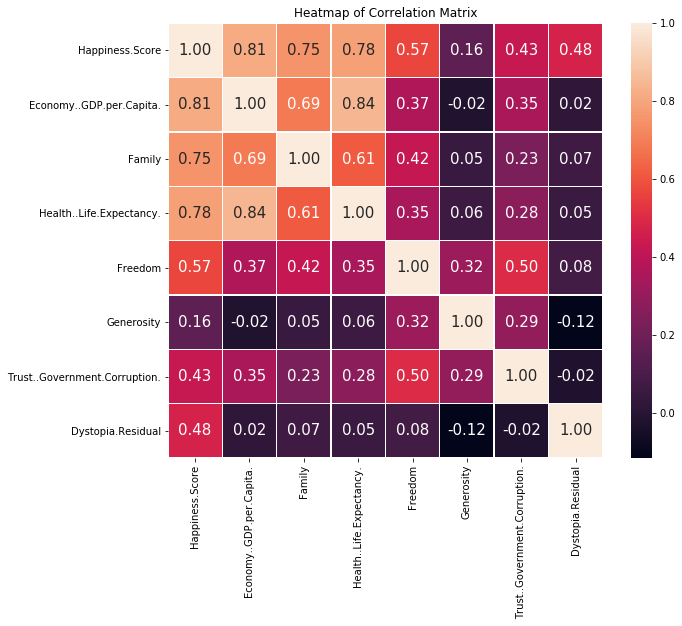

In [7]:
plt.figure(figsize=(10,8))
corr = original.drop(['Country', 'Whisker.high', 'Whisker.low'],axis = 1).corr()
sns.heatmap(corr, cbar = True, square = True, annot=True, linewidths = .5, fmt='.2f',annot_kws={'size': 15}) 
plt.title('Heatmap of Correlation Matrix')
plt.show()

Виждаме, че Happiness Score зависи силно от колоните Economy..GPD.per.Capita, Family и Health.Life.Expectancy:
- Happiness Score vs. Economy..per.Capita: 0.81
- Happiness Score vs. Family: 0.75
- Happiness Score vs. Health..Life.Expectancy: 0.78

<h3>Train and test set</h3>

Ще използвам функцията от scikit-learn, за да разделя dataset-a на две части - train и test. Ще махна следните колони: Country, Happiness.Rank, Whisker.low, Whisker.high. 

In [8]:
from sklearn.model_selection import train_test_split
X = original.drop(['Country', 'Happiness.Score', 'Whisker.high', 'Whisker.low'],axis = 1)
Y = original['Happiness.Score']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

<h3>Какво ще предсказваме - щастие!</h3>

Ще пусна линейна регресия на данните.

In [9]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Всичко мина добре, защото махнах колоната Country, която беше изцяло от низове и сега имам само числови стойности в dataset-а.
Следва да видим какво е научил.

In [10]:
regressor.score(X_train, Y_train)

0.99999995051015189

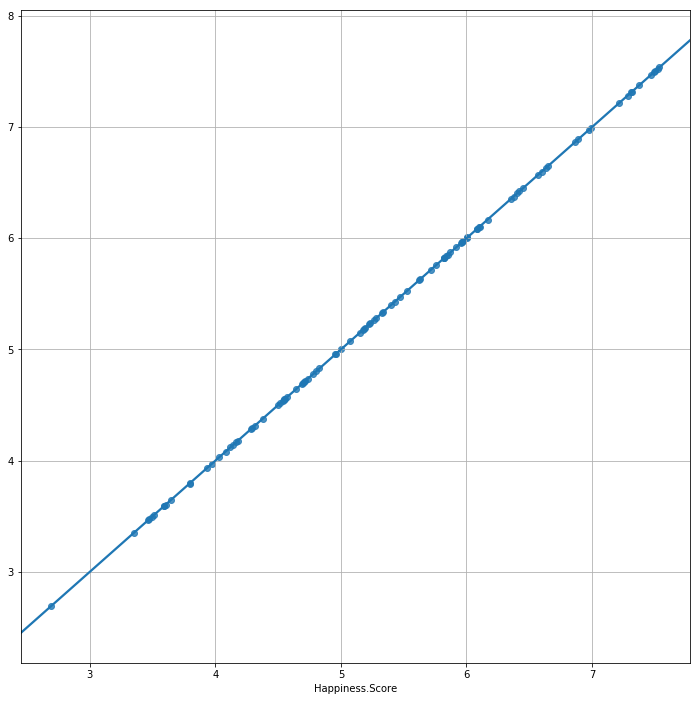

In [11]:
predictions_train = regressor.predict(X_train)
plt.figure(figsize=(12,12))
sns.regplot(Y_train, predictions_train)
plt.grid(True)
plt.show()

От нея се вижда, че данните ни са доста линейни и грешката е много малка.

Ще пробвам и с тест сета.

In [12]:
regressor.score(X_test, Y_test)

0.99999990286057538

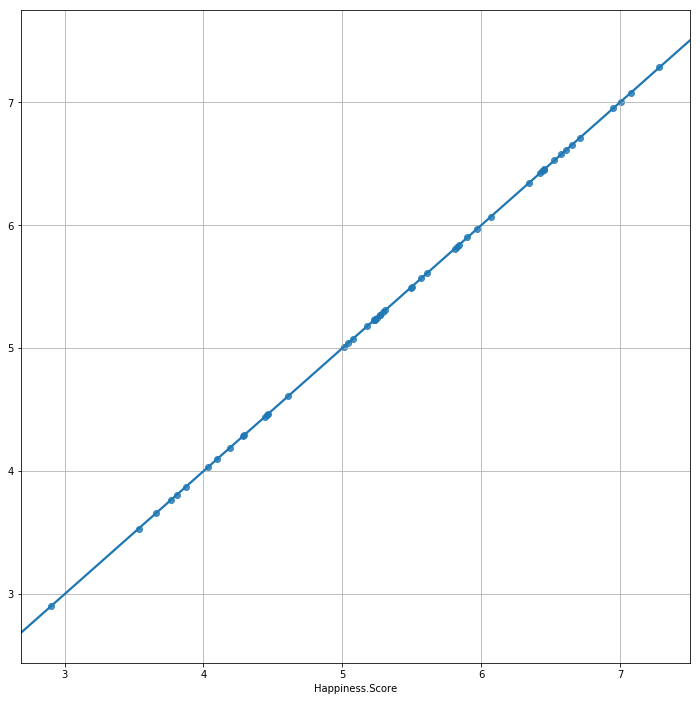

In [13]:
predictions_test = regressor.predict(X_test)
plt.figure(figsize=(12,12))
sns.regplot(Y_test, predictions_test)
plt.grid(True)
plt.show()

Данните са доста линейни и виждаме, че моделът се е справил много добре.
Сега следва да върнем колоната Country, като първо ще я прекараме през LabelEncoder-a, защото няма как да я оставим с низове.

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(original['Country'])

LabelEncoder()

Сега ще вземем цялата колона и ще я прекараме през encoder-a, за да трансформира всички низове в числа и ще изведа всички класове, които са в него.

In [15]:
encoded_country = le.transform(original['Country'])
print(le.classes_)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' 'Croatia'
 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Estonia' 'Ethiopia' 'Finland' 'France' 'Gabon' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Haiti' 'Honduras'
 'Hong Kong S.A.R., China' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lebanon'
 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg' 'Macedonia'
 'Madagascar' 'Malawi' 'Malaysia' 'Mali' 'Malta' 'Mauritania' 'Mauritius'

Добавяме новата колона с encode-натите стойности:

In [16]:
X['Country'] = encoded_country

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

И пускаме отново линейната регресия.

In [17]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
regressor.score(X_train, Y_train)

0.99999995090735916

- Стара стойност: 0.99999995051015189
- Нова стойност:  0.99999995090735916

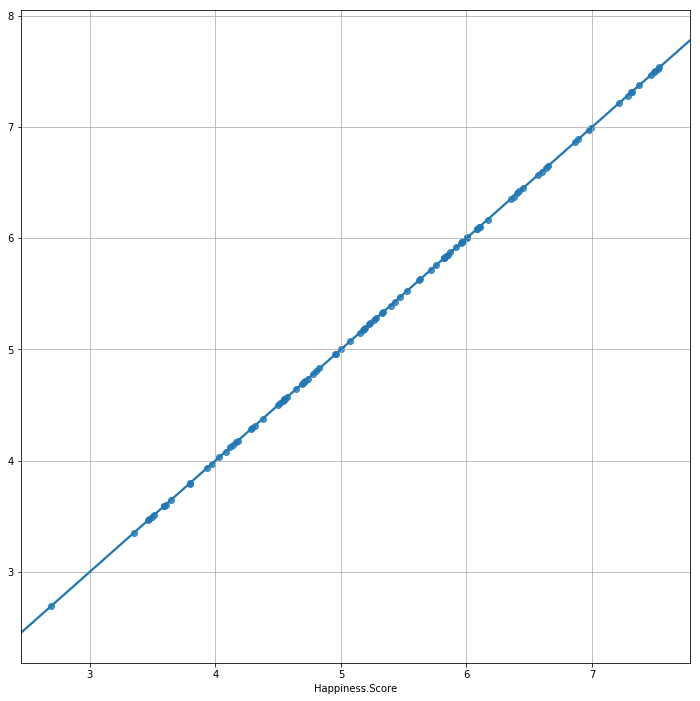

In [19]:
predictions_train = regressor.predict(X_train)
plt.figure(figsize=(12,12))
sns.regplot(Y_train, predictions_train)
plt.grid(True)
plt.show()

In [20]:
regressor.score(X_test, Y_test)

0.99999990093463309

- Стара стойност: 0.99999990286057538
- Нова стойност:  0.99999990093463309

Моделът е малко по-добър и генерализира добре.